In [3]:
import pandas as pd 
import numpy as np 

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [7]:
iris = pd.read_csv('Iris.csv')

In [12]:
iris = iris.drop(columns=['Id'], axis = 1)

In [13]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [175]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
iris.info()
# Doesnt indicate missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris['Species'].value_counts()
# Implies the dataset is balanced

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [18]:
cols = {"SL":"SepalLengthCm", "SW":"SepalWidthCm","PL":"PetalLengthCm","PW":"PetalWidthCm"}

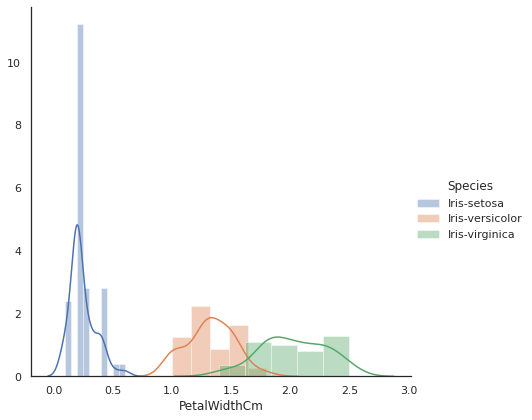

In [202]:
sns.FacetGrid(iris, hue="Species", size=6).map(sns.distplot, value).add_legend().savefig('Distribution Plot')


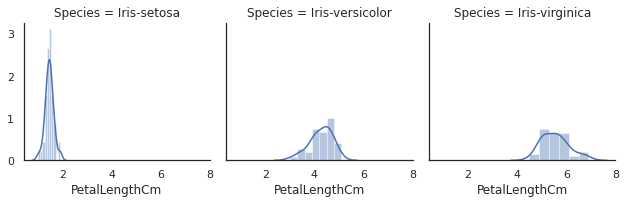

In [181]:
sns.FacetGrid(iris, col = "Species").map(sns.distplot, cols['PL'])
# We can use hue or col interchangibly 

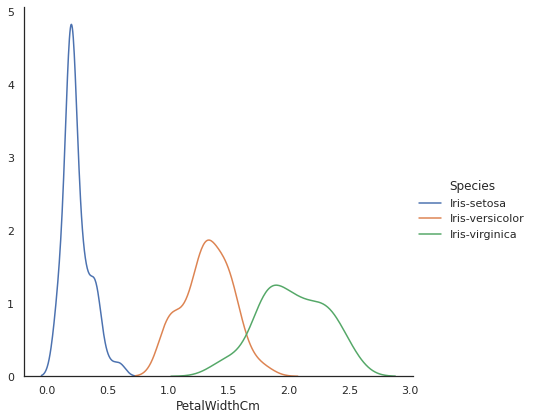

In [77]:
# A useful seaborn plot for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6).map(sns.kdeplot, value).add_legend()

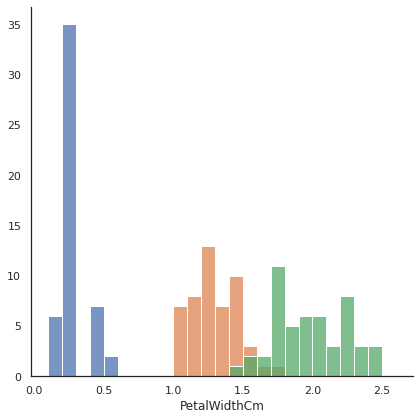

In [180]:
sns.FacetGrid(iris, hue = "Species", size = 6).map(sns.histplot,cols["PW"], binwidth=0.1)
# Histogram only takes one column 

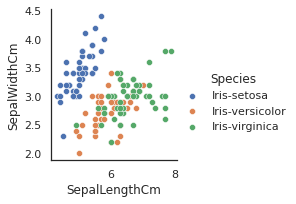

In [76]:
sns.FacetGrid(iris, hue = "Species").map(sns.scatterplot,cols["SL"], cols["SW"]).add_legend()
# Scatter plot takes in two values

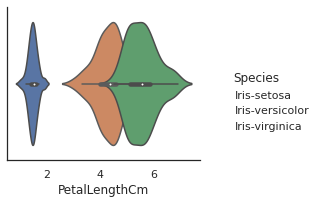

In [89]:
sns.FacetGrid(iris, hue = "Species").map(sns.violinplot,cols["PL"]).add_legend()
# 

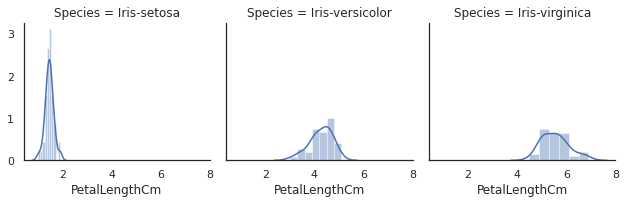

In [ ]:
# Suppose we have two categorical values, one is a feature and another is a class: Now we want to see the distributio of third class [numerical value]
# eg: Suppose we have three classes A, B, C and a feature: male, female 
# Now if we want to see the age distribution of male and female based on classes A, B, C 

sns.FacetGrid(iris, col = <'Class'>, row = <'Sex'>).map(sns.distplot, <z>)

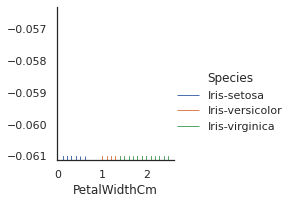

In [139]:
sns.FacetGrid(iris, hue = "Species").map(sns.rugplot,cols["PW"]).add_legend()

<AxesSubplot:>

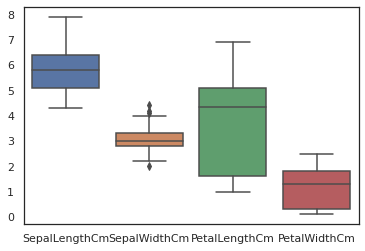

In [149]:
sns.boxplot(data = iris)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

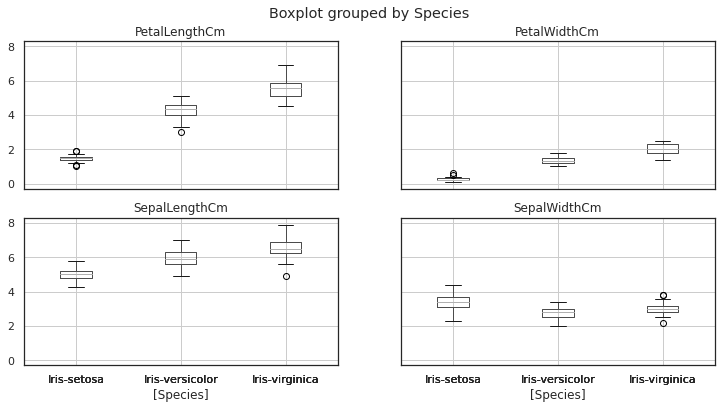

In [185]:
iris.boxplot(by = "Species", figsize = (12,6))

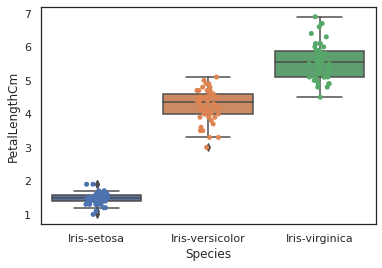

In [93]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(data=iris, x = 'Species',y = cols['PL'])
ax = sns.stripplot(data=iris, x='Species', y= cols['PL'], jitter=True)

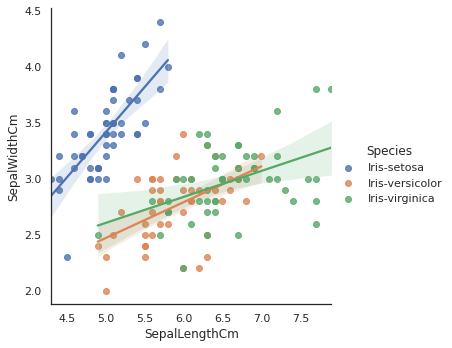

In [100]:
sns.FacetGrid(iris, hue= "Species", size =5).map(sns.regplot, cols['SL'], cols["SW"]).add_legend()

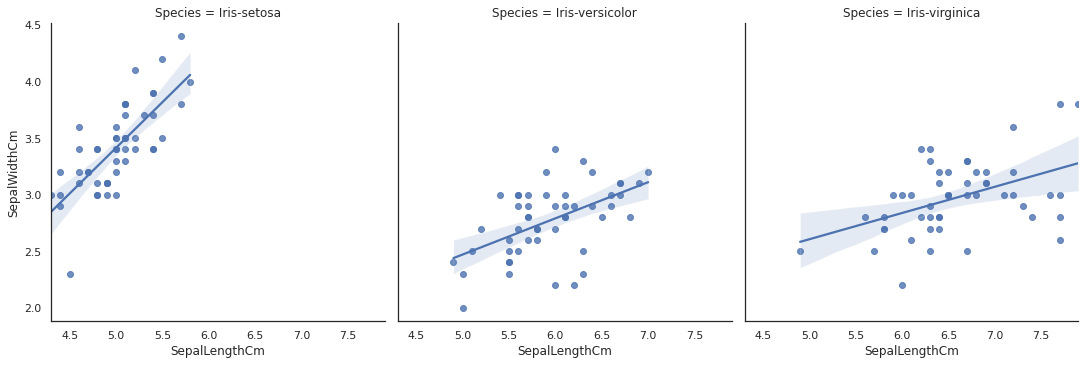

In [126]:
sns.lmplot(data = iris, x = cols ["SL"], y=cols["SW"], col = "Species")

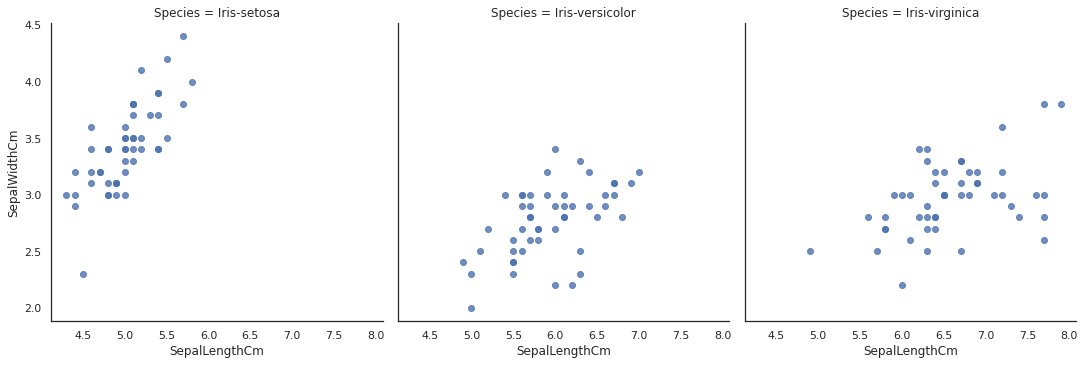

In [145]:
sns.lmplot(data = iris, x = cols ["SL"], y=cols["SW"], col = "Species", fit_reg =False)

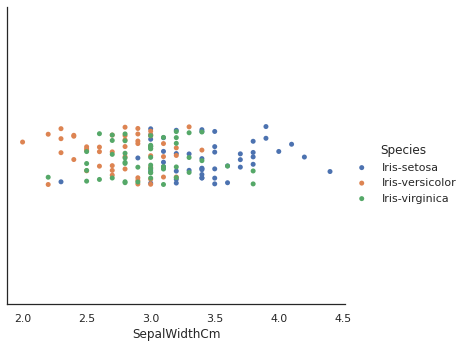

In [196]:
sns.FacetGrid(iris, hue= "Species", size =5).map(sns.stripplot, cols['SW']).add_legend()

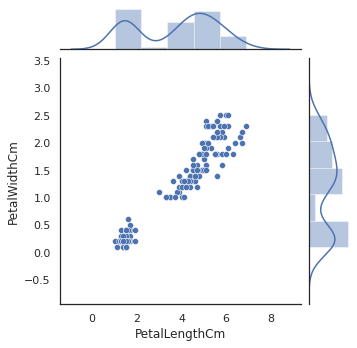

In [140]:
sns.JointGrid(x=cols['PL'],y=cols["PW"], data=iris, size=5).plot(sns.scatterplot, sns.distplot)

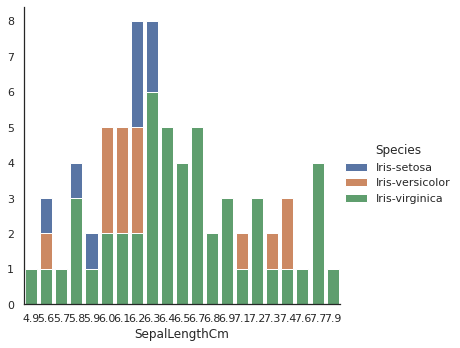

In [156]:
sns.FacetGrid(iris, hue= "Species", size =5).map(sns.countplot, cols['SL']).add_legend()

# cols["SL"] should ideally be a categorical value so it is not appropriate here    

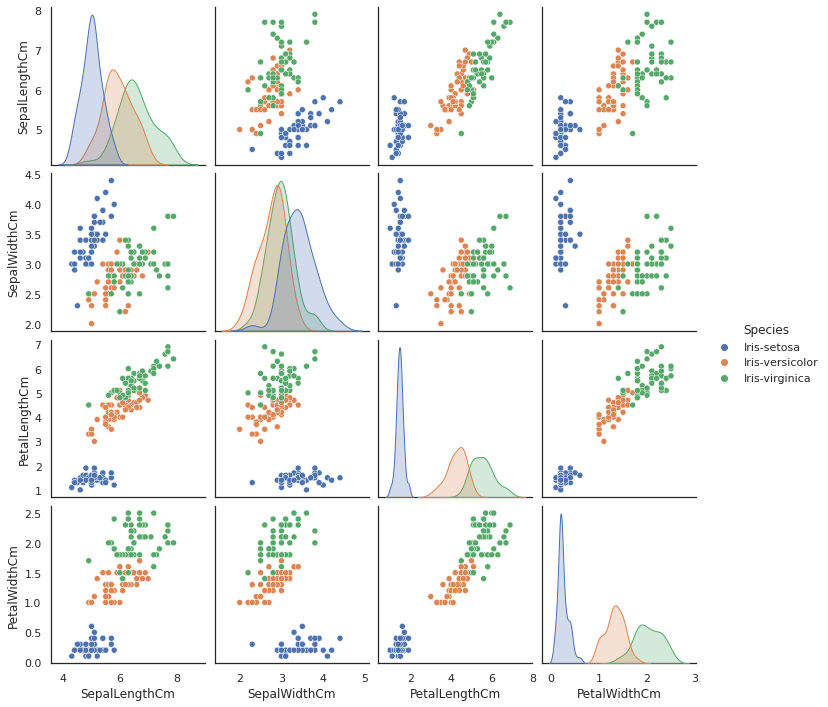

In [159]:
sns.pairplot(iris, hue ="Species")

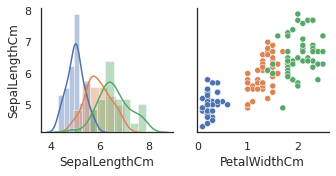

In [174]:
g = sns.PairGrid(iris, hue="Species", x_vars = [cols['SL'], cols['PW']], y_vars = [cols['SL']])
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)

# Specify x and y values in this way
# Can replace displot with histplot

<AxesSubplot:>

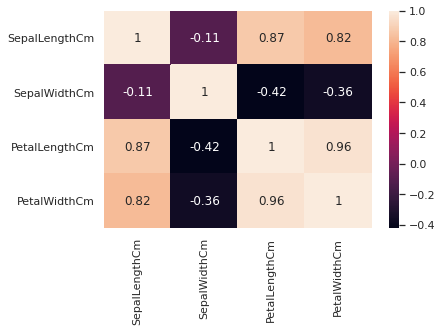

In [160]:
corr = iris.corr()
sns.heatmap(corr, annot =True)

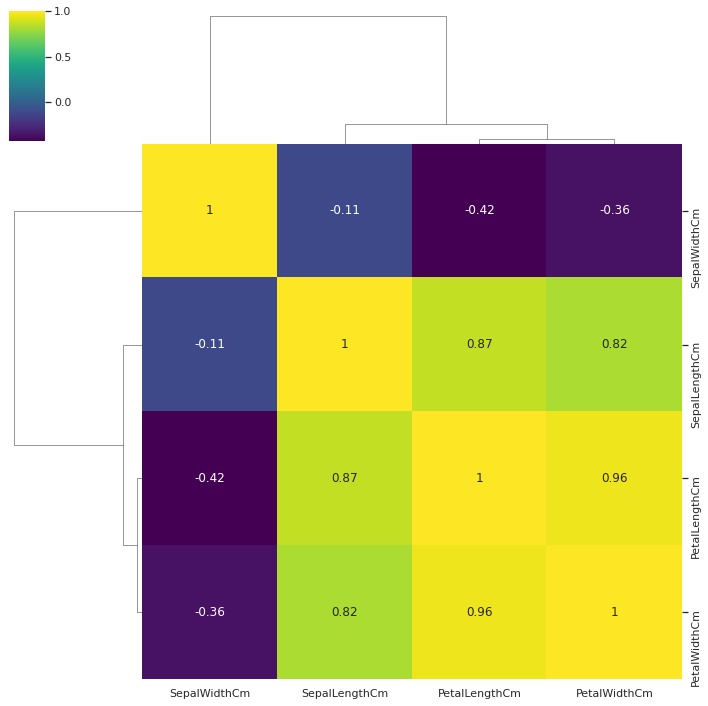

In [162]:
sns.clustermap(corr, annot=True,cmap='viridis')


In [194]:
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

<AxesSubplot:>

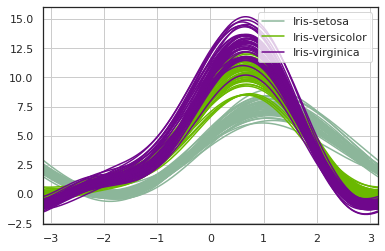

In [192]:
andrews_curves(iris, "Species")
# This indicates that there is a specific pattern to each class which machine learnin model can predict

<AxesSubplot:>

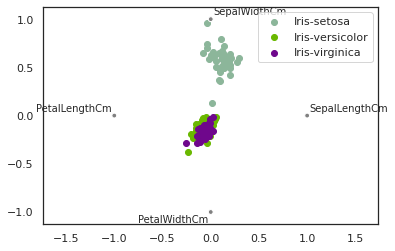

In [195]:
radviz(iris, "Species")

In [ ]:
"""Radviz Interpretation
- When we have N dimensional space (feature vectors)
- Imagine a circle with four equal slices 
- According to Pandas, radviz allows us to project an N-dimensional data set into a 2D space where the influence of each dimension can be interpreted as a balance between the importance of all dimensions. 
- In this example:
  - Versicoour and Virginca are more coser to the petal width means that these two classes are more related with peta width
  - While the Iris Setosa is more realted with Sepal Width means we can most probably use sepal width to classify setosa than other features
"""

<AxesSubplot:>

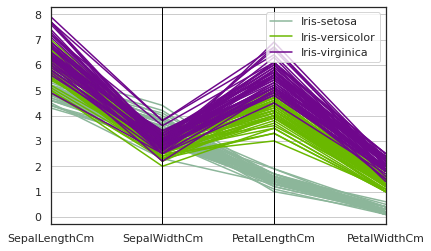

In [193]:
parallel_coordinates(iris, "Species")

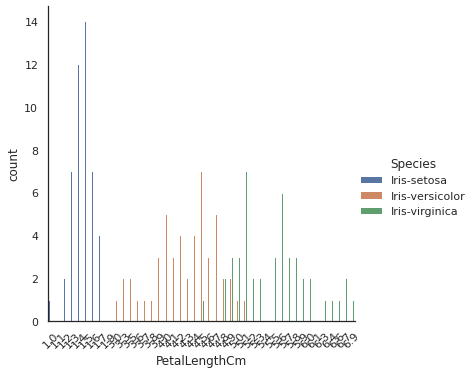

In [201]:
sns.factorplot(cols['PL'], data=iris, hue='Species', kind='count' ).set_xticklabels(rotation=45)

In [ ]:
# Joint Plot
# KDE Plot
# HistPlot
# Scatter Plot
# Distribution Plot
# Strip Plot
# Violin Plot
# Relation Plot

"""
Selecting Seaborn Plots:

Univariate Analysis:
- sns.distplot()  = Best place to start
    - sns.rugplot() or sns.kdeplot() = Can be useful alternatives

Regression Analysis:
- sns.lmplot()

Distribution Plots
    a. Dist-Plot
    b. Joint Plot
    c. Pair Plot
    d. Rug Plot
Categorical Plots
    a. Bar Plot
    b. Count Plot
    c. Box Plot
    d. Violin Plot
Advanced Plots
    a. Strip Plot
    b. Swarm Plot
Matrix Plots
    a. Heat Map
    b. Cluster Map
Grids
    a. Facet Grid   
Regression Plots